In [17]:
import pandas as pd
import numpy as np
import os
import matplotlib
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as pyo
from matplotlib import pyplot as plt

In [2]:
mydir=os.getcwd()

In [3]:
df=pd.read_csv(os.path.join(mydir,'../data/data_v0.3_with_status.csv'))

## **Data Preprocessing**

In [4]:
df=df[df['Status']=='Open']

In [5]:
df['Time']=pd.to_datetime(df['Time'])

In [6]:
df['Year'] = df['Time'].dt.year
df['DayOfYear'] = df['Time'].dt.dayofyear
df['Month'] = df['Time'].dt.month_name()
df['DayOfWeek'] = df['Time'].dt.day_name()
df['HourOfDay']=df['Time'].dt.hour

In [7]:
df['HourOfDay']=df['HourOfDay'].map({0:'Late Night',1:'Late Night',2:'Late Night',3:'Late Night',4:'Late Night',5:'Early Morning',6:'Early Morning',7:'Early Morning',8:'Morning',9:'Morning',10:'Morning',11:'Afternoon',12:'Afternoon',13:'Afternoon',14:'Afternoon',15:'Evening',16:'Evening',17:'Evening',18:'Evening',19:'Night',20:'Night',21:'Night',22:'Night',23:'Late Night'})

##**Data Visualization**

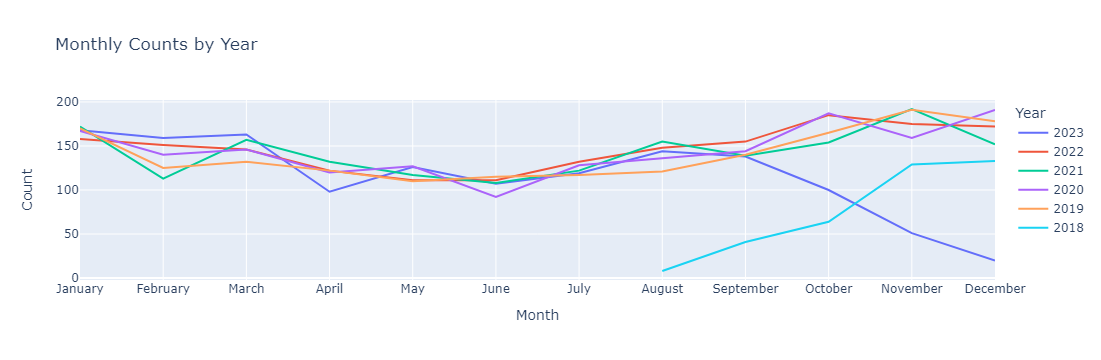

In [31]:
count_data = df.groupby(['Month', 'Year']).size().reset_index(name='Count')
days =  ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
count_data['Month'] = pd.Categorical(count_data['Month'], categories=days, ordered=True)
count_data.sort_values(by='Month',inplace=True)
fig=px.line(count_data, x='Month', y='Count', color='Year', title='Monthly Counts by Year')
fig.show()
#fig.write_html("Monthly_Counts_by_Year.html")

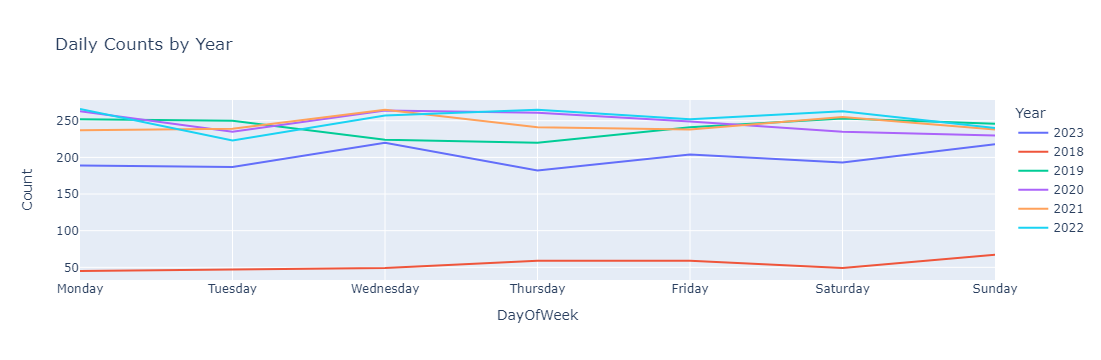

In [11]:
count_data = df.groupby(['DayOfWeek', 'Year']).size().reset_index(name='Count')
days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
count_data['DayOfWeek'] = pd.Categorical(count_data['DayOfWeek'], categories=days, ordered=True)
count_data.sort_values(by='DayOfWeek',inplace=True)
fig=px.line(count_data, x='DayOfWeek', y='Count', color='Year', title='Daily Counts by Year')

#fig.write_html("Daily_Counts_by_Year.html")

fig.show()

C:\Users\irfan\AppData\Local\Temp\ipykernel_16340\134986649.py:5: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



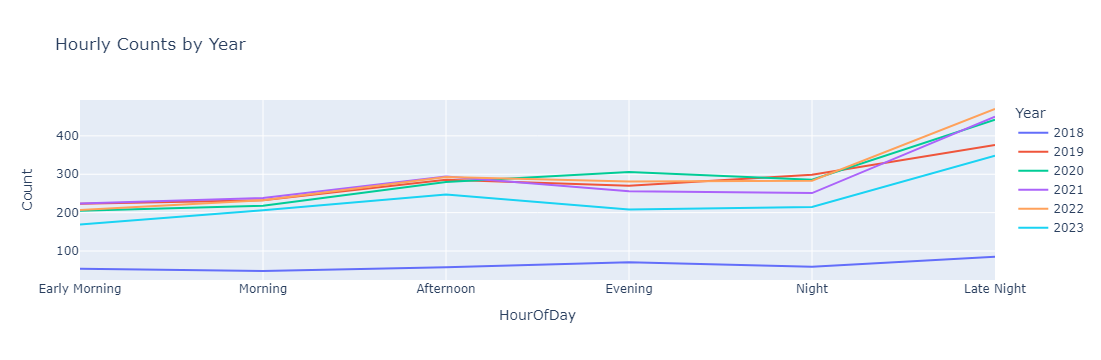

In [28]:
days = ['Early Morning', 'Morning', 'Afternoon', 'Evening', 'Night','Late Night']
df['HourOfDay'] = pd.Categorical(df['HourOfDay'], categories=days, ordered=True)

# Group by 'HourOfDay' and 'Year', then calculate the count
count_data = df.groupby(['HourOfDay', 'Year']).size().reset_index(name='Count')

# Create a sample line plot
fig = px.line(count_data, x='HourOfDay', y='Count', color='Year', title='Hourly Counts by Year')

fig.show()
#fig.write_html("Hourly_Counts_by_Year.html")

C:\Users\irfan\AppData\Local\Temp\ipykernel_16340\1591819543.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\irfan\AppData\Local\Temp\ipykernel_16340\1591819543.py:7: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



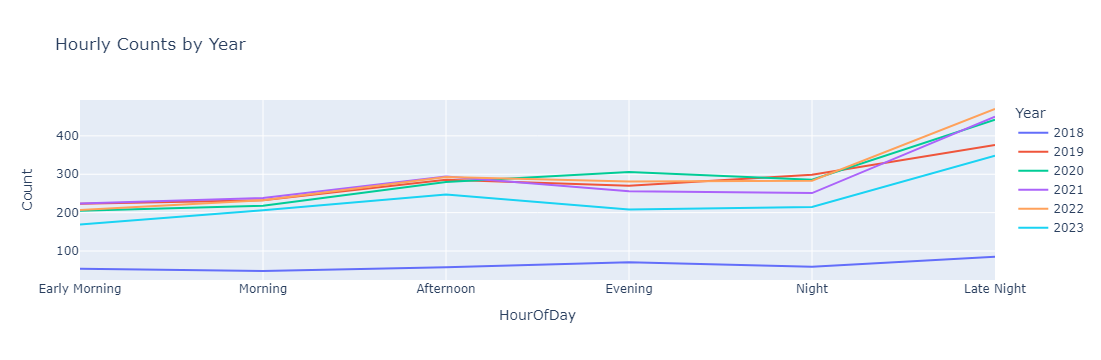

In [15]:
count_data = df.groupby(['HourOfDay', 'Year']).size().reset_index(name='Count')
days = ['Early Morning', 'Morning', 'Afternoon', 'Evening', 'Late Night']
count_data['HourOfDay'] = pd.Categorical(count_data['HourOfDay'], categories=days, ordered=True)
count_data.sort_values(by='HourOfDay',inplace=True)
# Create a sample scatter plot
#px.line(x=['Early Morning','Morning','Afternoon','Evening','Night','Late Night'], y=df.groupby('HourOfDay').size(), labels={'x': 'X-axis', 'y': 'Y-axis'})
count_data = df.groupby(['HourOfDay', 'Year']).size().reset_index(name='Count')
fig=px.line(count_data, x='HourOfDay', y='Count', color='Year', title='Hourly Counts by Year')
#fig.write_html("interactive_plot.html")

fig.show()


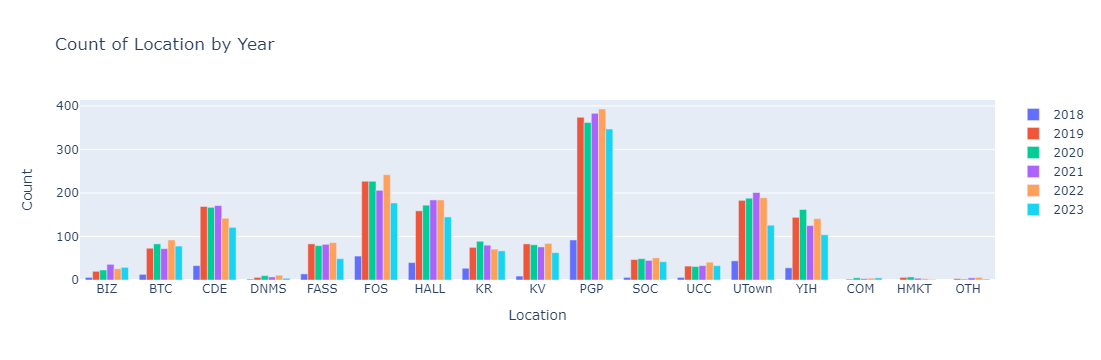

In [21]:
grouped_data = df.groupby([ 'Year','Location']).size().reset_index(name='Count')
# Create a list of Bar traces for each category
sorted_years = sorted(df['Year'].unique())

# Create a list of Bar traces for each year
traces = []
for year in sorted_years:
    year_data = grouped_data[grouped_data['Year'] == year]
    trace = go.Bar(
        x=year_data['Location'],
        y=year_data['Count'],
        name=str(year)
    )
    traces.append(trace)

# Create the layout for the bar chart
layout = go.Layout(
    barmode='group',  # Set the barmode to 'group' for side-by-side bars
    title='Count of Location by Year',
    xaxis=dict(title='Location'),
    yaxis=dict(title='Count')
)

# Create the figure and plot it
fig = go.Figure(data=traces, layout=layout)
pyo.iplot(fig)
#fig.write_html(Count_of _Location_by_Year.html")

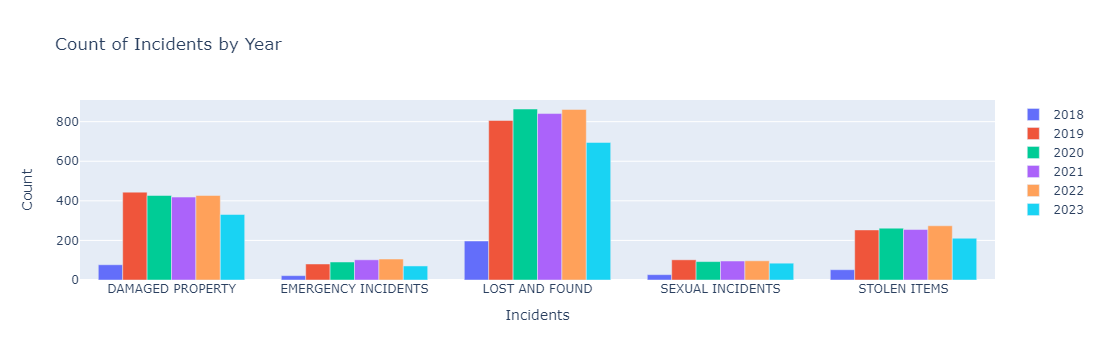

In [27]:
grouped_data = df.groupby([ 'Year','Incidents']).size().reset_index(name='Count')

# Create a list of Bar traces for each category
sorted_years = sorted(df['Year'].unique())

# Create a list of Bar traces for each year
traces = []
for year in sorted_years:
    year_data = grouped_data[grouped_data['Year'] == year]
    trace = go.Bar(
        x=year_data['Incidents'],
        y=year_data['Count'],
        name=str(year)
    )
    traces.append(trace)

# Create the layout for the bar chart
layout = go.Layout(
    barmode='group',  # Set the barmode to 'group' for side-by-side bars
    title='Count of Incidents by Year',
    xaxis=dict(title='Incidents'),
    yaxis=dict(title='Count')
)

# Create the figure and plot it
fig = go.Figure(data=traces, layout=layout)
fig.show()
#fig.write_html("Count_of_Incidents_by_Year.html")

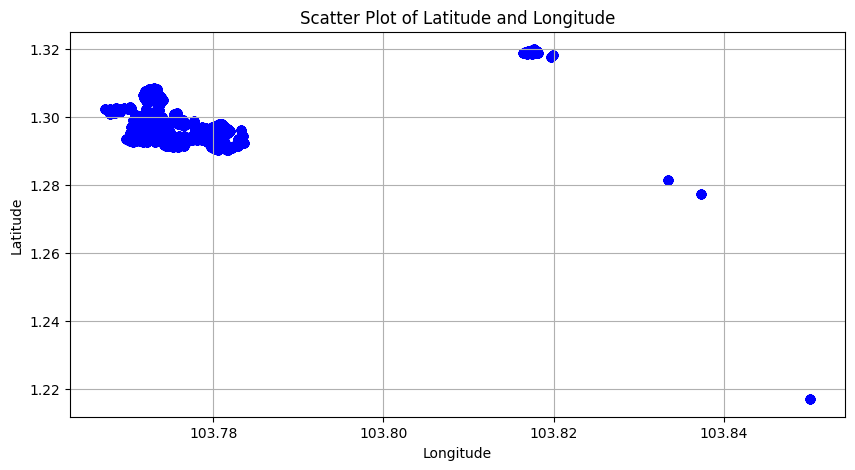

In [18]:
plt.figure(figsize=(10, 5))
plt.scatter(df['Longitude'], df['Latitude'], c='blue', marker='o')
plt.title('Scatter Plot of Latitude and Longitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()